<a href="https://colab.research.google.com/github/AmelNozieres/NLP_Generate_poems/blob/master/Generate_Baudelaire_poem_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import tensorflow as tf

import numpy as np
import os
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 

In [2]:
path_to_file = tf.keras.utils.get_file('Les_fleurs_du_mal_Baudelaire', 'https://raw.githubusercontent.com/AmelNozieres/NLP_Generate_poems/master/Les_fleurs_du_mal_Baudelaire')


147456/146903 [==============================] - 0s 0us/step


In [3]:
tokenizer = Tokenizer()
data = open(path_to_file, 'rb').read().decode(encoding='utf-8')
corpus = data.lower().split("\n")

print(corpus[:100])
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)



['la sottise, l’erreur, le péché, la lésine,', 'occupent nos esprits et travaillent nos corps,', 'et nous alimentons nos aimables remords,', 'comme les mendiants nourrissent leur vermine.', 'nos péchés sont têtus, nos repentirs sont lâches ;', 'nous nous faisons payer grassement nos aveux,', 'et nous rentrons gaiement dans le chemin bourbeux,', 'croyant par de vils pleurs laver toutes nos taches.', 'sur l’oreiller du mal c’est satan trismégiste', 'qui berce longuement notre esprit enchanté,', 'et le riche métal de notre volonté', 'est tout vaporisé par ce savant chimiste.', 'c’est le diable qui tient les fils qui nous remuent !', 'aux objets répugnants nous trouvons des appas ;', 'chaque jour vers l’enfer nous descendons d’un pas,', 'sans horreur, à travers des ténèbres qui puent.', 'ainsi qu’un débauché pauvre qui baise et mange', 'le sein martyrisé d’une antique catin,', 'nous volons au passage un plaisir clandestin', 'que nous pressons bien fort comme une vieille orange.', 'serré, f

In [4]:
len(corpus)

3575

In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
print(tokenizer.word_index)

{'et': 1, 'de': 2, 'le': 3, 'la': 4, 'les': 5, 'des': 6, 'un': 7, 'qui': 8, 'dans': 9, 'comme': 10, 'à': 11, 'je': 12, 'que': 13, 'en': 14, 'du': 15, 'au': 16, 'sur': 17, 'mon': 18, 'où': 19, 'ce': 20, 'tu': 21, 'pour': 22, 'son': 23, 'une': 24, 'se': 25, 'd’un': 26, 'ô': 27, 'ton': 28, 'est': 29, 'tout': 30, 'sans': 31, 'cœur': 32, 'plus': 33, 'par': 34, 'nous': 35, 'aux': 36, 'ses': 37, 'il': 38, '—': 39, 'ces': 40, 'ma': 41, 'ne': 42, 'tes': 43, 'vous': 44, 'sa': 45, 'yeux': 46, 'avec': 47, 'ta': 48, 'dont': 49, 'leurs': 50, 'me': 51, 'pas': 52, 'toi': 53, 'ciel': 54, 'quand': 55, 'sous': 56, 'ou': 57, 'mes': 58, 'c’est': 59, 'te': 60, 'âme': 61, 'vers': 62, 'leur': 63, 'si': 64, 'ainsi': 65, 'sont': 66, 'soleil': 67, 'fait': 68, 'moi': 69, 'elle': 70, 'nos': 71, 'mais': 72, 'qu’un': 73, 'plein': 74, 'corps': 75, 'jamais': 76, 'vieux': 77, 'beauté': 78, 'd’une': 79, 'bien': 80, 'cette': 81, 'tous': 82, 'ils': 83, 'soir': 84, 'mort': 85, 'a': 86, 'toujours': 87, 'vos': 88, 'nuit': 89

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(predictors, label, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
634/634 [==============================] - 14s 22ms/step - loss: 7.3829 - accuracy: 0.0465
Epoch 2/100
634/634 [==============================] - 14s 22ms/step - loss: 6.3280 - accuracy: 0.0808
Epoch 3/100
634/634 [==============================] - 14s 23ms/step - loss: 5.3978 - accuracy: 0.1191
Epoch 4/100
634/634 [==============================] - 14s 22ms/step - loss: 4.7856 - accuracy: 0.1594
Epoch 5/100
634/634 [==============================] - 14s 23ms/step - loss: 3.3416 - accuracy: 0.2988
Epoch 6/100
634/634 [==============================] - 14s 23ms/step - loss: 2.6787 - accuracy: 0.4026
Epoch 7/100
634/634 [==============================] - 14s 23ms/step - loss: 2.2754 - accuracy: 0.4746
Epoch 8/100
634/634 [==============================] - 14s 22ms/step - loss: 1.9541 - accuracy: 0.5398
Epoch 9/100
634/634 [==============================] - 14s 23ms/step - loss: 1.7011 - accuracy: 0.5901
Epoch 10/100
634/634 [==============================] - 14s 22ms/step - l

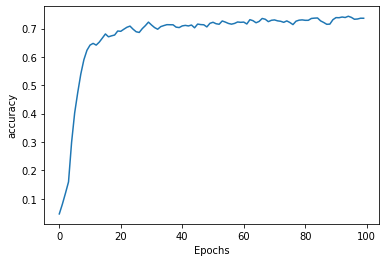

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')

In [11]:
seed_text = "La vie"
next_words = 50
  
for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  #print(predicted)
  for word,index in tokenizer.word_index.items():
    #print(word)
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

La vie impudente et criarde beauté dites beauté noir et nu » chère indolente deux blés chère mange de froids tissus blés imparfaite analyse amère se se se voila pâme chère se frayer se blés se cognant de morts se blés souterraine imparfaite se pâme se solennelle magie vipères vipères » mea


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 12, 100)           609700    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 12, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 12, 300)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 3048)              307848    
_________________________________________________________________
dense_2 (Dense)              (None, 6097)              18589753  
Total params: 19,968,901
Trainable params: 19,968,901
Non-trainable params: 0
__________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
634/634 [==============================] - 11s 18ms/step - loss: 7.4343 - accuracy: 0.0341
Epoch 2/100
634/634 [==============================] - 11s 18ms/step - loss: 6.9686 - accuracy: 0.0365
Epoch 3/100
634/634 [==============================] - 11s 17ms/step - loss: 6.7188 - accuracy: 0.0404
Epoch 4/100
634/634 [==============================] - 11s 17ms/step - loss: 6.5732 - accuracy: 0.0473
Epoch 5/100
634/634 [==============================] - 11s 17ms/step - loss: 6.4276 - accuracy: 0.0525
Epoch 6/100
634/634 [==============================] - 11s 18ms/step - loss: 6.2616 - accuracy: 0.0580
Epoch 7/100
634/634 [==============================] - 11s 17ms/step - loss: 6.1057 - accuracy: 0.0605
Epoch 8/100
634/634 [==============================] - 11s 18ms/step - loss: 5.9760 - accuracy: 0.0668
Epoch 9/100
634/634 [==============================] - 11s 17ms/step - loss: 5.8497 - accuracy: 0.0741
Epoch 10/100
634/634 [==============================] - 11s 17ms/step - l

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(6097, 100)


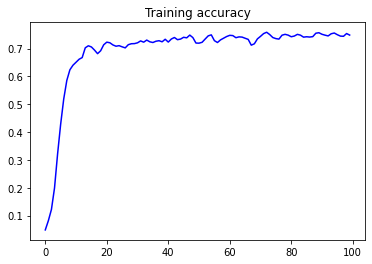

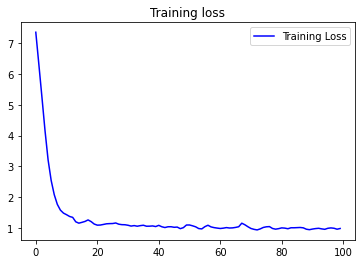

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "La beauté"
next_words = 50

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	#print(predicted)
	output_word = "_"
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	#print("o : " + str(output_word)+ " - " + str(len(output_word)))
	#print(ord(output_word[0]))
	#print(seed_text)
	if ord(output_word[0]) != 13:
		seed_text = seed_text + " " + str(output_word)

#print("test" + seed_text)
print("seed text " + str(seed_text))

seed text La beauté du corps est un sublime de tes yeux de velours se croix et quelque vieux cheveux autant » tu magiques ô éphémère plaisants chère chère indolente gange d’un soir sur chère vieux abandonnés morts se pâme des abandonnés employer la pelle et les blés pâme dans ta chute au mon
